<a href="https://colab.research.google.com/github/triductran00/DeepLearning/blob/main/SimpleConvNet_GPU_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/SimpleConvNet-GPU

/content/drive/MyDrive/SimpleConvNet-GPU


epoch:0, train acc:0.0986, test acc:0.107
epoch:1, train acc:0.815, test acc:0.769
epoch:2, train acc:0.879, test acc:0.855
epoch:3, train acc:0.8812, test acc:0.858
epoch:4, train acc:0.9122, test acc:0.892
epoch:5, train acc:0.9282, test acc:0.896
epoch:6, train acc:0.9388, test acc:0.914
epoch:7, train acc:0.951, test acc:0.92
epoch:8, train acc:0.9546, test acc:0.923
epoch:9, train acc:0.9634, test acc:0.933
epoch:10, train acc:0.9678, test acc:0.938
epoch:11, train acc:0.9704, test acc:0.935
epoch:12, train acc:0.975, test acc:0.937
epoch:13, train acc:0.982, test acc:0.947
epoch:14, train acc:0.9852, test acc:0.953
epoch:15, train acc:0.988, test acc:0.949
epoch:16, train acc:0.989, test acc:0.95
epoch:17, train acc:0.9906, test acc:0.95
epoch:18, train acc:0.9922, test acc:0.954
epoch:19, train acc:0.9944, test acc:0.956


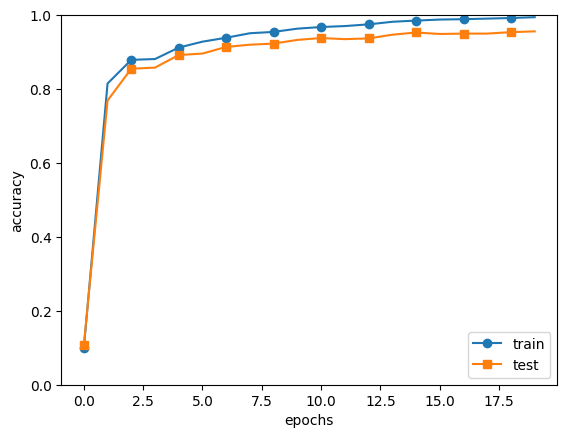

In [ ]:
# coding: utf-8
import cupy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from simple_convnet import SimpleConvNet
from optimizer import *


# 0:Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

# 1:Settings
network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
optimizer = Adam()   #SGD(lr=0.01)
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(train_size / batch_size, 1)
max_iter = int(max_epochs * iter_per_epoch)

train_loss_list = []
train_acc_list = []
test_acc_list = []

epoch_cnt = 0

for i in range(max_iter):
    batch_mask = np.random.choice(train_size, batch_size).get()
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(np.asarray(x_batch), np.asarray(t_batch))
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(np.asarray(x_train), np.asarray(t_train))
        test_acc = network.accuracy(np.asarray(x_test), np.asarray(t_test))
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# Plot
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x.get(), np.asarray(train_acc_list).get(), marker='o', label='train', markevery=2)
plt.plot(x.get(), np.asarray(test_acc_list).get(), marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()